In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 中文顯示處理（Windows / Colab）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # Windows
plt.rcParams['axes.unicode_minus'] = False                # 正常顯示負號


In [20]:
# 載入資料
df = pd.read_csv('combined_112.csv')  # 替換為實際路徑
df["日期"] = pd.to_datetime(df["日期"])
df = df.sort_values("日期")

# 確認欄位
df.columns


Index(['日期', '風速m/s', '風向D', '氣壓mb', '日輻射量cal/cm2', '蒸發量mm', '相對溼度%', '最高溫度',
       '最低溫度', '平均溫度', '翡翠水庫日平均水位/公尺', '水庫有效蓄水量/百萬立方公尺', '集水區平均雨量/毫米',
       '水庫進流量/立方公尺', '水庫放流量/立方公尺', '進流量減放流量/立方公尺', '南勢溪流量/立方公尺',
       '南北勢溪合計原水量/立方公尺'],
      dtype='object')

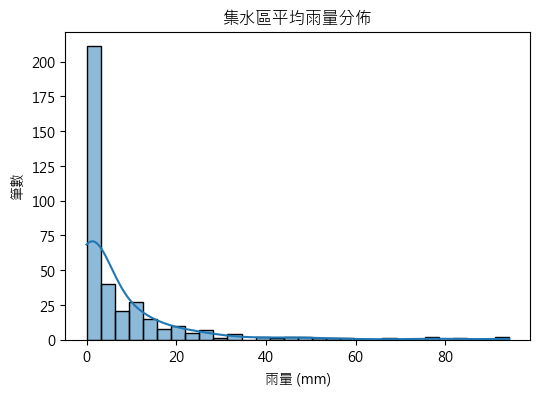

偏態值: 3.40


In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df["集水區平均雨量/毫米"], kde=True, bins=30)
plt.title("集水區平均雨量分佈")
plt.xlabel("雨量 (mm)")
plt.ylabel("筆數")
plt.show()

print(f"偏態值: {df['集水區平均雨量/毫米'].skew():.2f}")


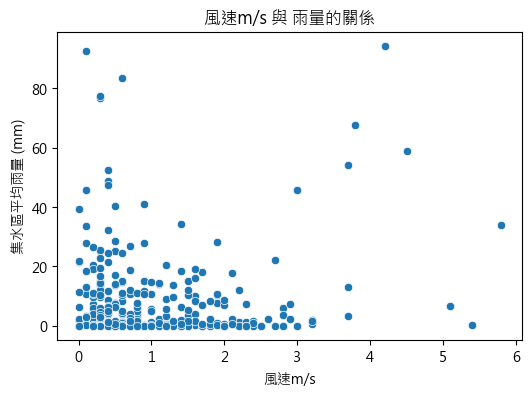

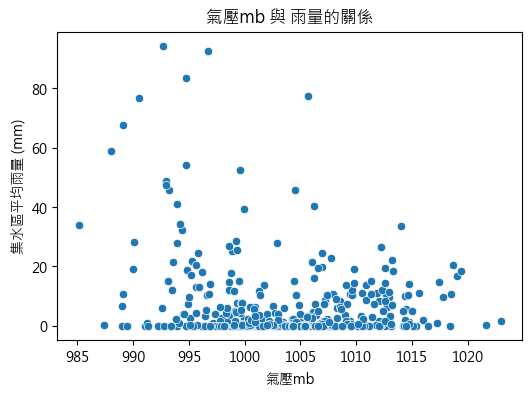

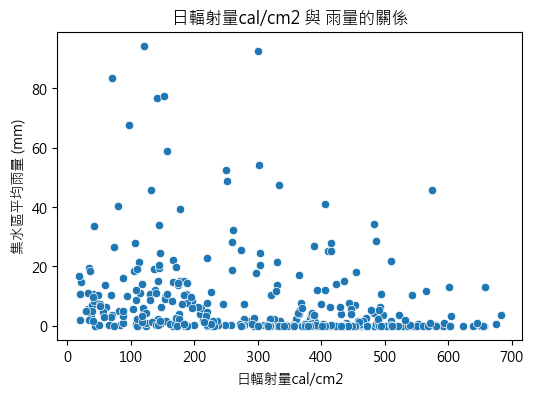

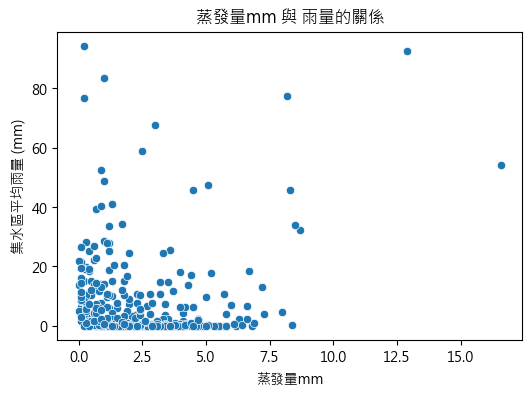

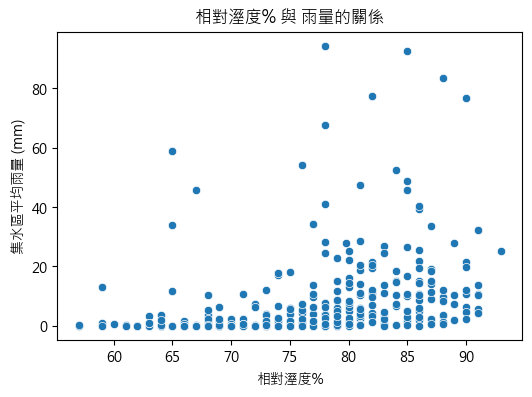

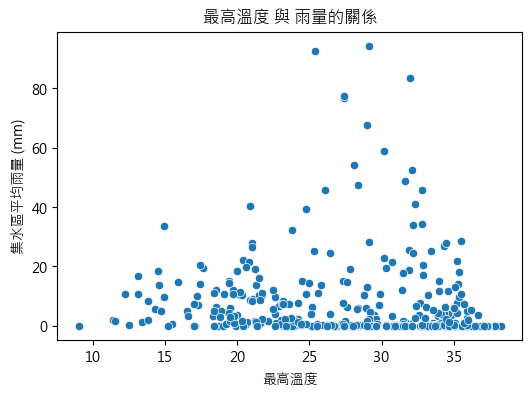

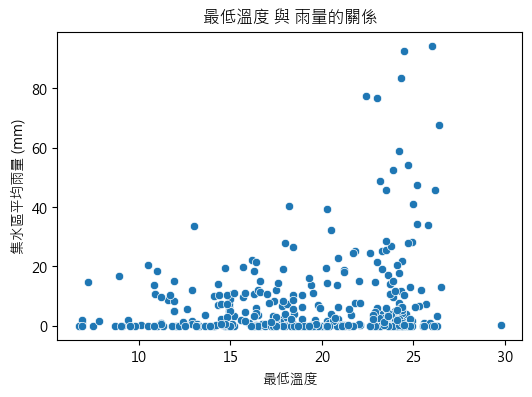

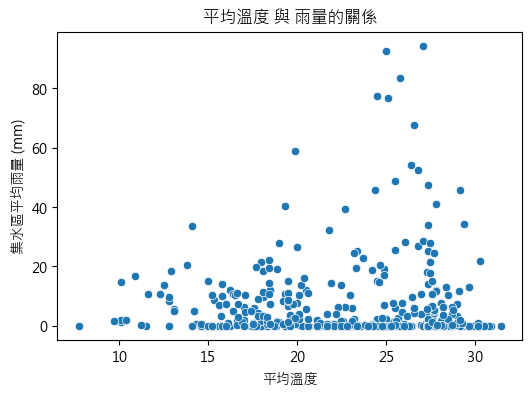

In [22]:
features = ['風速m/s', '氣壓mb', '日輻射量cal/cm2', 
            '蒸發量mm', '相對溼度%', '最高溫度', '最低溫度', '平均溫度']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='集水區平均雨量/毫米')
    plt.title(f'{col} 與 雨量的關係')
    plt.xlabel(col)
    plt.ylabel('集水區平均雨量 (mm)')
    plt.show()


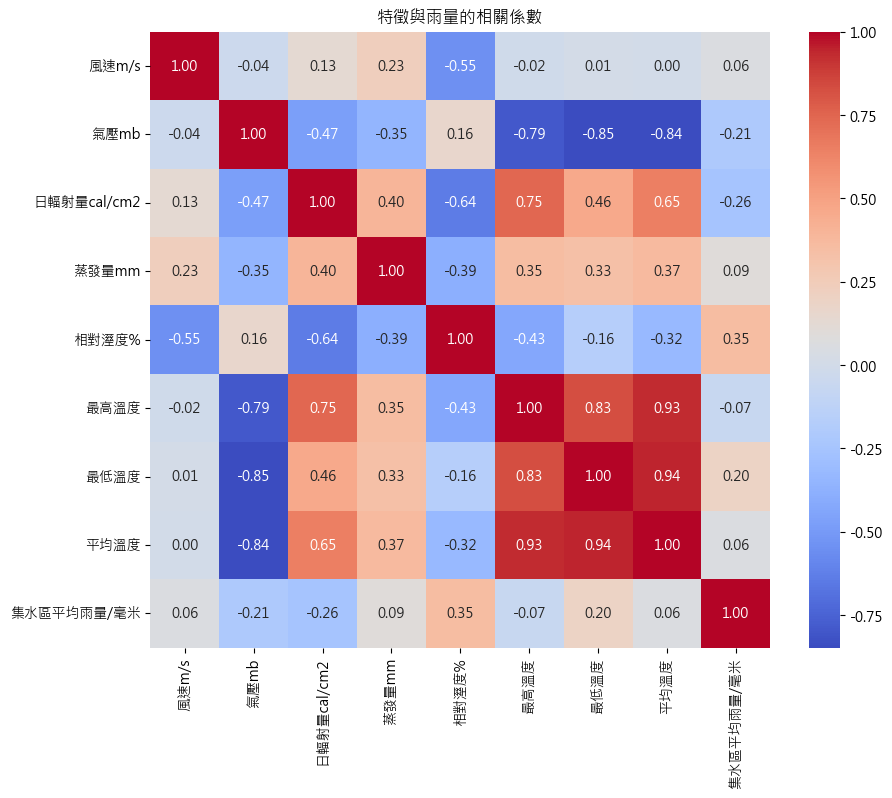

In [23]:
plt.figure(figsize=(10, 8))
corr = df[features + ['集水區平均雨量/毫米']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("特徵與雨量的相關係數")
plt.show()


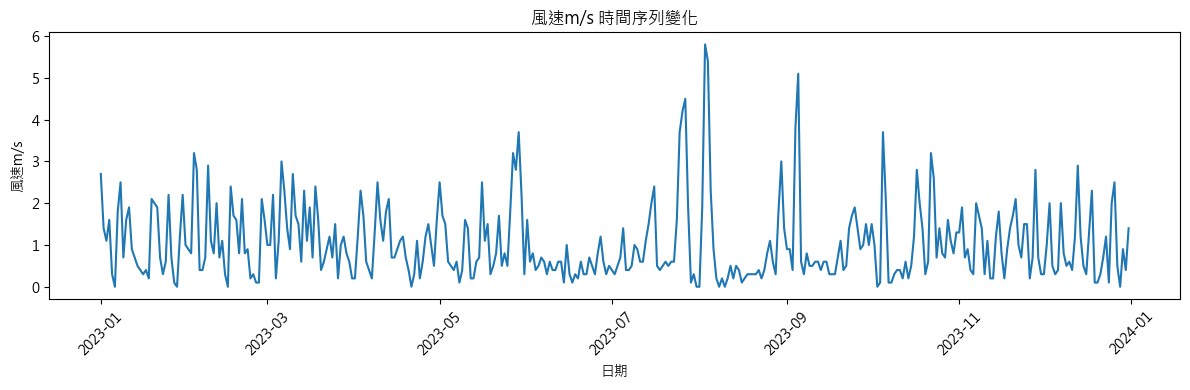

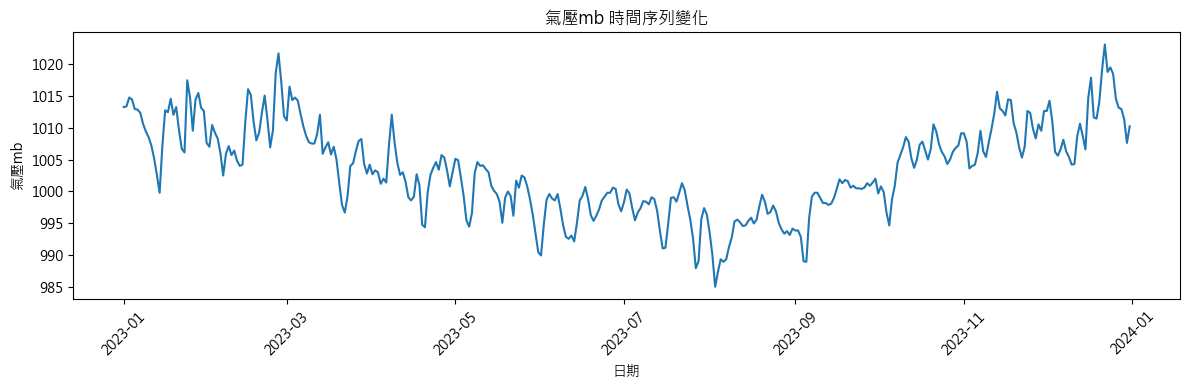

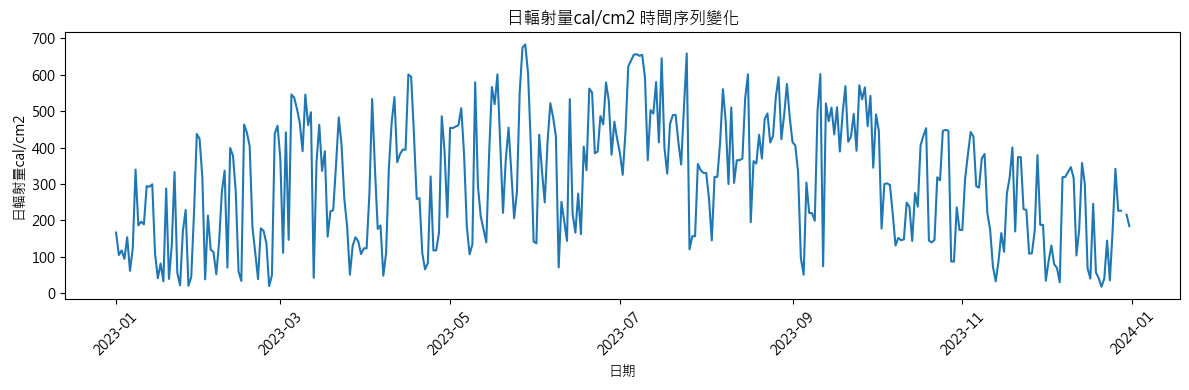

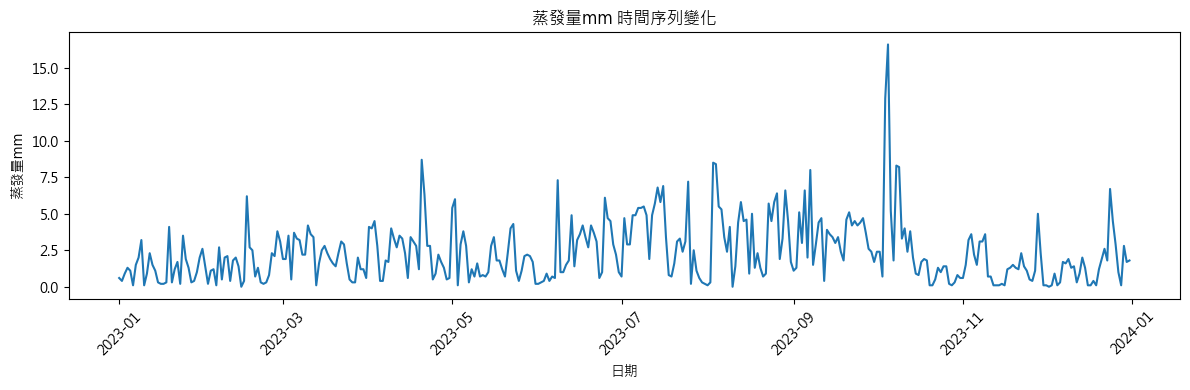

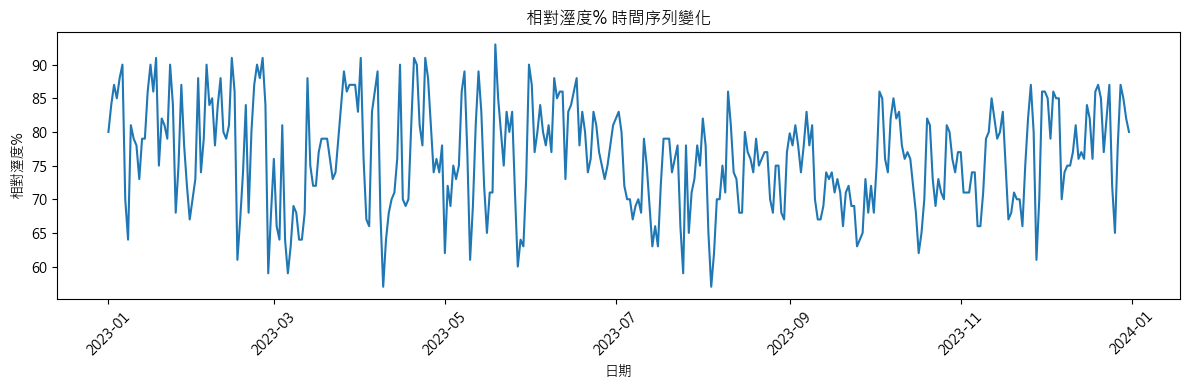

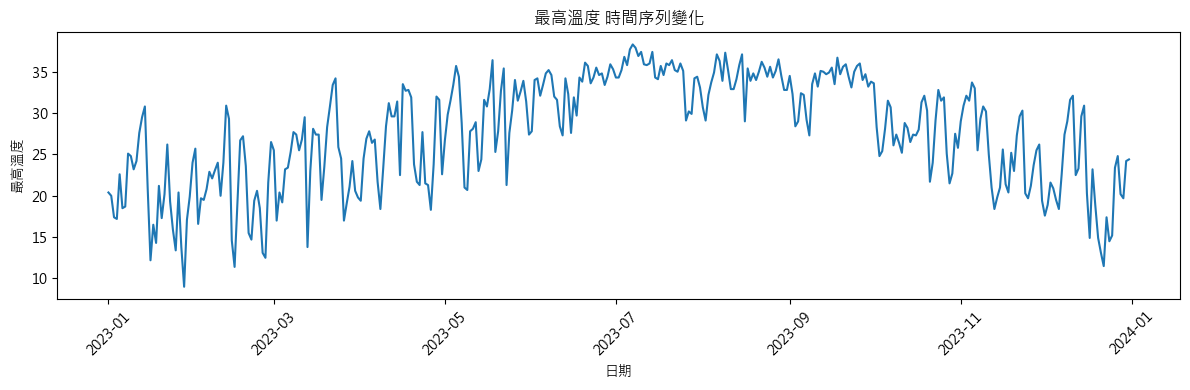

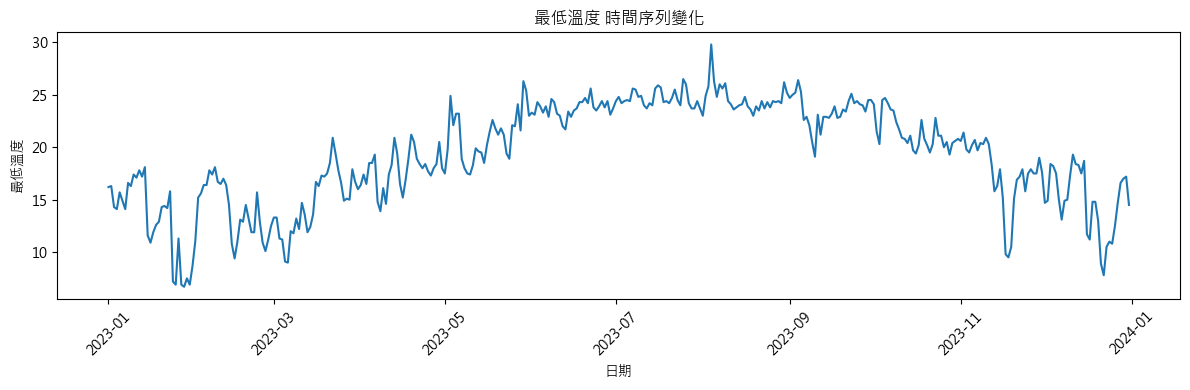

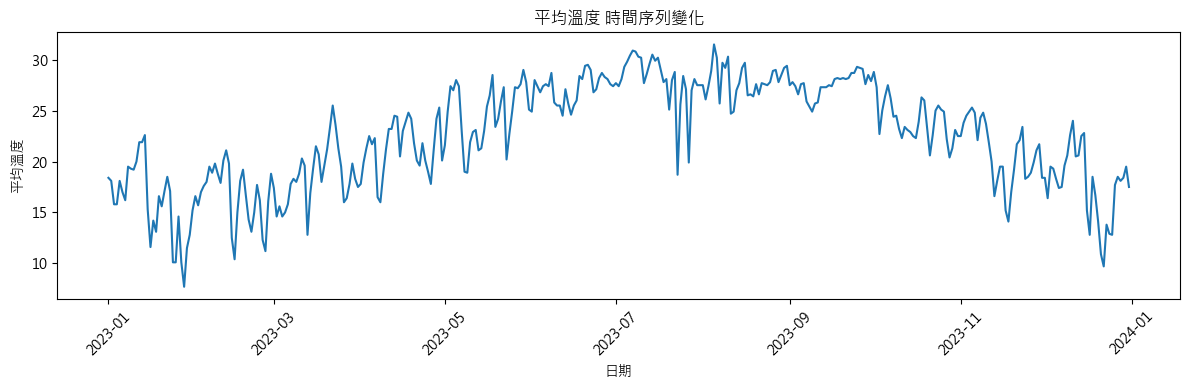

In [31]:
# 設定要視覺化的欄位
features = ['風速m/s', '氣壓mb', '日輻射量cal/cm2', '蒸發量mm', 
            '相對溼度%', '最高溫度', '最低溫度', '平均溫度']

# 繪製每個 feature 的時間序列圖
for feature in features:
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[feature])
    plt.title(f'{feature} 時間序列變化')
    plt.xlabel('日期')
    plt.ylabel(feature)
    plt.xticks(rotation=45)  # 旋轉 x 軸的日期標籤
    plt.tight_layout()
    plt.show()

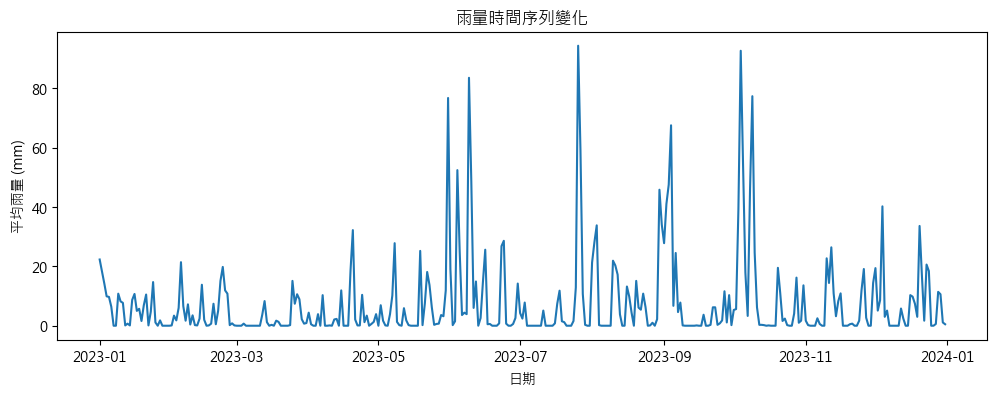

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(df["日期"], df["集水區平均雨量/毫米"])
plt.title("雨量時間序列變化")
plt.xlabel("日期")
plt.ylabel("平均雨量 (mm)")
plt.show()
